In [26]:

import gymnasium as gym
import gym_anytrading
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3 import A2C, PPO, DQN # select model
from stable_baselines3.common.evaluation import evaluate_policy
# from stable_baselines3.common.cmd_util import make_vec_env
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import quantstats as qs

In [27]:
data = pd.read_pickle('data/binance-BTCUSDT-1h.pkl')
data.reset_index(inplace=True, drop=True)

data['Date'] = data.date_close
del data['date_close']
data.columns = ["Open", "High", "Low", "Close", "Volume", "Date"]
df = data.copy()

In [28]:
data

,Open,High,Low,Close,Volume,Date
0,46216.93,46731.39,46208.37,46656.13,1503.33095,2022-01-01 01:00:00
1,46656.14,46949.99,46574.06,46778.14,943.81539,2022-01-01 02:00:00
2,46778.14,46928.94,46721.96,46811.77,485.16860,2022-01-01 03:00:00
3,46811.77,46916.63,46760.12,46813.20,562.88971,2022-01-01 04:00:00
4,46813.21,46887.33,46591.23,46711.05,861.88389,2022-01-01 05:00:00
...,...,...,...,...,...,...
14920,26621.68,26680.00,26569.65,26645.63,1226.04755,2023-09-14 18:00:00
14921,26645.63,26860.49,26581.00,26581.00,1991.36536,2023-09-14 19:00:00
14922,26581.01,26682.87,26558.00,26678.14,881.15091,2023-09-14 20:00:00
14923,26678.13,26723.64,26558.02,26568.72,892.91097,2023-09-14 21:00:00


In [32]:
def create_env(df, start_index, end_index, window_size):
    env = gym.make('forex-v0', df=df,  frame_bound=(start_index,
                   end_index), window_size=window_size)
    env.trade_fee = 0
    return env

In [33]:
window_size = 50
start_index = window_size
end_index = len(df)
def env_maker():
    return create_env(df, start_index, end_index, window_size)

from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env(lambda: env_maker(), n_envs=100) # 1000
model = A2C(MlpPolicy, env, verbose=1) # PPO(MlpPolicy, env, verbose=1)

Using cuda device


In [34]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}") 

mean_reward:-235601796.88 +/- 0.00


In [35]:
model.learn(total_timesteps=10000000)

-------------------------------------
| time/                 |           |
|    fps                | 36985     |
|    iterations         | 100       |
|    time_elapsed       | 1         |
|    total_timesteps    | 50000     |
| train/                |           |
|    entropy_loss       | -0.154    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -3.76e+05 |
|    value_loss         | 1.67e+13  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 36442    |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 100000   |
| train/                |          |
|    entropy_loss       | -0.626   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 5.82e+04 |
|    value_loss         

In [36]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:3234492.19 +/- 0.00


/home/rr/anaconda3/envs/rl-fin/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


IndexError: index 14925 is out of bounds for axis 0 with size 14925

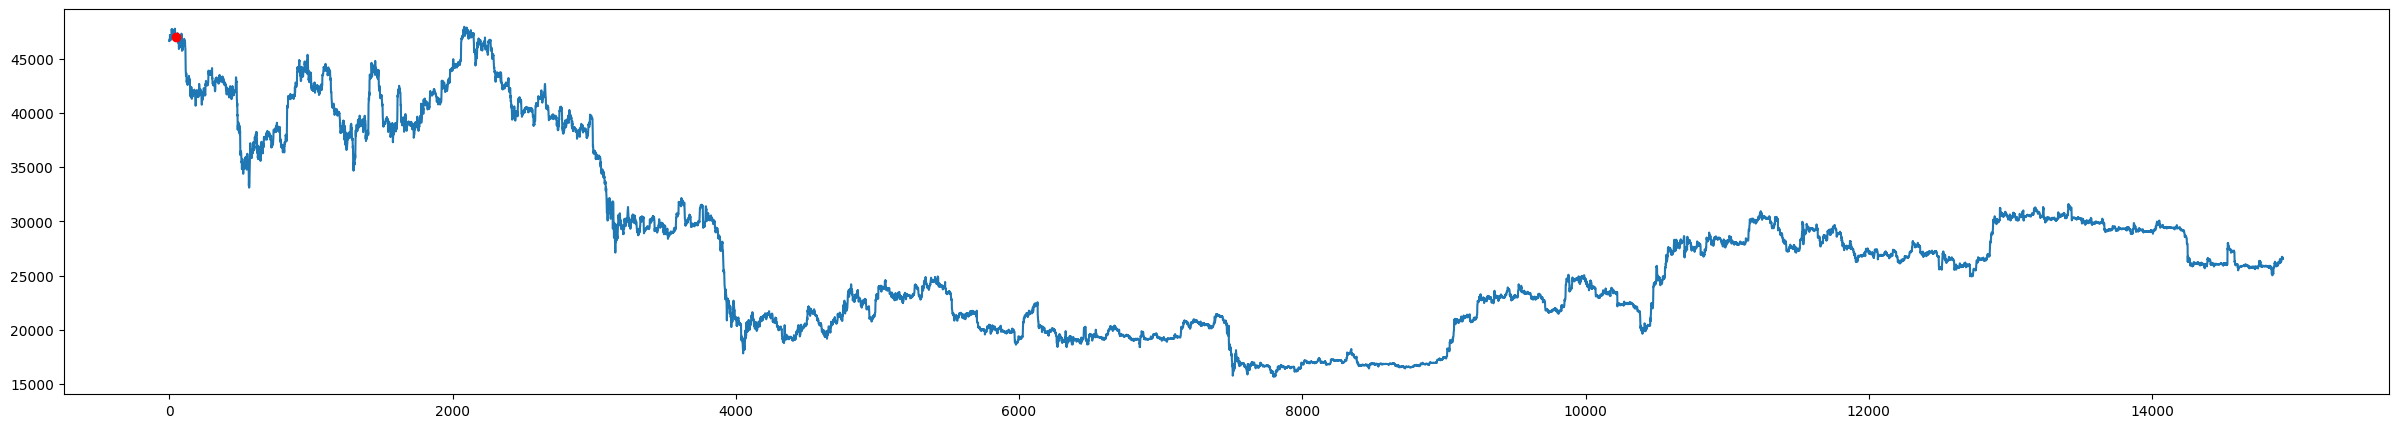

In [54]:
env = gym.make('forex-v0', df=df, frame_bound=(start_index,
               end_index), window_size=window_size)
env.trade_fee = 0

obs = env.reset()[0]
while True:
    try:
        action, state = model.predict(obs)
        
        obs, reward, done, info, _ = env.step(action)
        if done:
            print("info", info)
            break
    except:
        break


plt.figure(figsize=(30, 5))
# plt.cla()
env.render_all()
plt.show()

In [55]:
env.

<OrderEnforcing<PassiveEnvChecker<ForexEnv<forex-v0>>>>